# Análise da Evolução do Uso de Cartões de Crédito no Brasil e sua Relação com Indicadores Macroeconômicos Globais

Este projeto tem como objetivo investigar como o uso de cartões de crédito no Brasil evoluiu ao longo do tempo e se existe alguma correlação temporal com indicadores macroeconômicos globais, utilizando a inflação dos EUA como referência. A análise considera dados do Banco Central do Brasil e dados de inflação dos EUA, permitindo observar tendências, padrões e possíveis relações entre o comportamento do consumidor brasileiro e o cenário econômico internacional.

In [0]:
#Importando bibliotecas necessárias
import requests
import pandas as pd
from datetime import datetime

In [0]:
# Conectando na API para baixar dados
url = 'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=D4824K0BEKKE3KXG'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Consumer Price Index for all Urban Consumers', 'interval': 'monthly', 'unit': 'index 1982-1984=100', 'data': [{'date': '2025-11-01', 'value': '324.122'}, {'date': '2025-10-01', 'value': '.'}, {'date': '2025-09-01', 'value': '324.800'}, {'date': '2025-08-01', 'value': '323.976'}, {'date': '2025-07-01', 'value': '323.048'}, {'date': '2025-06-01', 'value': '322.561'}, {'date': '2025-05-01', 'value': '321.465'}, {'date': '2025-04-01', 'value': '320.795'}, {'date': '2025-03-01', 'value': '319.799'}, {'date': '2025-02-01', 'value': '319.082'}, {'date': '2025-01-01', 'value': '317.671'}, {'date': '2024-12-01', 'value': '315.605'}, {'date': '2024-11-01', 'value': '315.493'}, {'date': '2024-10-01', 'value': '315.664'}, {'date': '2024-09-01', 'value': '315.301'}, {'date': '2024-08-01', 'value': '314.796'}, {'date': '2024-07-01', 'value': '314.540'}, {'date': '2024-06-01', 'value': '314.175'}, {'date': '2024-05-01', 'value': '314.069'}, {'date': '2024-04-01', 'value': '313.548'}, {'date

In [0]:
#Visualizando os dados da API.

df_inflacao = pd.DataFrame(data["data"])[["date", "value"]]
df_inflacao.head()

,date,value
0,2025-11-01,324.122
1,2025-10-01,.
2,2025-09-01,324.800
3,2025-08-01,323.976
4,2025-07-01,323.048


In [0]:
#Vendo tabela usando Spark
#display(df_inflacao)


In [0]:
#df = spark.read.format('csv').option('header', True).load('workspace/default/inflacao')

In [0]:
df_spark = spark.table("cartoes_de_credito_ativos") 
display(df_spark) 
df_spark.show()

data,valor
2011-01-01,78.0
2012-01-01,78.0
2013-01-01,82.0
2014-01-01,83.0
2015-01-01,85.0
2016-01-01,84.0
2017-01-01,82.0
2018-01-01,99.0
2019-01-01,100.0
2020-01-01,134.0


+----------+-----+
|      data|valor|
+----------+-----+
|2011-01-01| 78.0|
|2012-01-01| 78.0|
|2013-01-01| 82.0|
|2014-01-01| 83.0|
|2015-01-01| 85.0|
|2016-01-01| 84.0|
|2017-01-01| 82.0|
|2018-01-01| 99.0|
|2019-01-01|100.0|
|2020-01-01|134.0|
|2021-01-01|177.0|
|2022-01-01|209.0|
+----------+-----+



In [0]:
df_spark = spark.table("inflacao").withColumnRenamed("date", "Ano").withColumnRenamed("value", "Inflação")
df_spark.plot.line(x="Ano", y="Inflação")

**Criando arquivos Spark em csv.**

In [0]:
##TRANSFORMANDO OS DADOS DA API EM FORMATO SPARK PARA UTILIZA

# Transformar o JSON em Pandas DataFrame
df_inflacao = pd.DataFrame(data["data"]); print(df_inflacao.columns)  # Cria um DataFrame Pandas a partir dos dados da API e exibe as colunas
df_inflacao["value"] = pd.to_numeric(df_inflacao["value"], errors='coerce')  # Converte a coluna 'value' para tipo numérico, tratando erros como NaN
df_inflacao["date"] = pd.to_datetime(df_inflacao["date"])  # Converte a coluna 'date' para o tipo datetime

# Altera o formato do campo date para mm/yyyy
df_inflacao["date"] = df_inflacao["date"].dt.strftime("%m/%Y")

# Renomeia o campo 'date' para 'data'
df_inflacao = df_inflacao.rename(columns={"date": "data"})

display(df_inflacao)  # Visualizar se os dados foram realmente carregados

from pyspark.sql import SparkSession  # Importa a classe SparkSession do PySpark

spark = SparkSession.builder.getOrCreate()  # Cria ou obtém uma SparkSession ativa
spark_df_inflacao = spark.createDataFrame(df_inflacao)  # Converte o DataFrame Pandas para um DataFrame Spark

# Salvar como CSV usando Unity Catalog Volume
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.inflacao_volume")  # Cria um volume no Unity Catalog se não existir
spark_df_inflacao.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/inflacao_volume/inflacao")  # Salva o DataFrame Spark como CSV no volume especificado, sobrescrevendo se já existir

display("/Volumes/workspace/default/inflacao_volume/inflacao")

Index(['date', 'value'], dtype='object')


data,value
11/2025,324.122
10/2025,null
09/2025,324.8
08/2025,323.976
07/2025,323.048
06/2025,322.561
05/2025,321.465
04/2025,320.795
03/2025,319.799
02/2025,319.082


Databricks visualization. Run in Databricks to view.

'/Volumes/workspace/default/inflacao_volume/inflacao'

In [0]:
#Criando arquivo csv no spark tabela cartoes_de_credito_ativos
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.quantidade_transacoes_volume")

# Salva a tabela como CSV no volume
from pyspark.sql import functions as F

df_cartoes = spark.table("quantidade_transacoes")
if "data" in df_cartoes.columns:
    df_cartoes = df_cartoes.withColumn("data", F.date_format("data", "MM/yyyy"))

df_cartoes.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/quantidade_transacoes_volume/quantidade_transacoes")

display(spark.sql("SHOW VOLUMES IN workspace.default"))
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.cartoes_de_credito_ativos_volume")

# Salva a tabela como CSV no volume
df_cartoes = spark.table("cartoes_de_credito_ativos")
if "data" in df_cartoes.columns:
    df_cartoes = df_cartoes.withColumn("data", F.date_format("data", "MM/yyyy"))
df_cartoes.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/cartoes_de_credito_ativos_volume/cartoes_de_credito_ativos")

display(spark.sql("SHOW VOLUMES IN workspace.default"))

database,volume_name
default,cartoes_de_credito_ativos_volume
default,cartoes_de_credito_emitidos_volume
default,inflacao_volume
default,quantidade_transacoes_volume
default,valor_transacoes_volume


database,volume_name
default,cartoes_de_credito_ativos_volume
default,cartoes_de_credito_emitidos_volume
default,inflacao_volume
default,quantidade_transacoes_volume
default,valor_transacoes_volume


In [0]:
# Criando arquivo csv no spark tabela cartoes_de_credito_ativos
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.cartoes_de_credito_emitidos_volume")

# Salva a tabela como CSV no volume
from pyspark.sql import functions as F

df_cartoes = spark.table("cartoes_de_credito_emitidos")
df_cartoes = df_cartoes.withColumn("data", F.date_format("data", "MM/yyyy"))
df_cartoes.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/cartoes_de_credito_emitidos_volume/cartoes_de_credito_emitidos")

display(spark.sql("SHOW VOLUMES IN workspace.default"))

database,volume_name
default,cartoes_de_credito_ativos_volume
default,cartoes_de_credito_emitidos_volume
default,inflacao_volume
default,quantidade_transacoes_volume
default,valor_transacoes_volume


In [0]:
# Criando arquivo csv no spark tabela  quantidade_transacoes
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.quantidade_transacoes_volume")

# Salva a tabela como CSV no volume
from pyspark.sql import functions as F

df_cartoes = spark.table("quantidade_transacoes")
if "data" in df_cartoes.columns:
    df_cartoes = df_cartoes.withColumn("data", F.date_format("data", "MM/yyyy"))
df_cartoes.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/quantidade_transacoes_volume/quantidade_transacoes")

display(spark.sql("SHOW VOLUMES IN workspace.default"))

database,volume_name
default,cartoes_de_credito_ativos_volume
default,cartoes_de_credito_emitidos_volume
default,inflacao_volume
default,quantidade_transacoes_volume
default,valor_transacoes_volume


In [0]:
# Criando arquivo csv no spark tabela  valor_transacoes
spark.sql("CREATE VOLUME IF NOT EXISTS workspace.default.valor_transacoes_volume")

# Salva a tabela como CSV no volume
from pyspark.sql import functions as F

df_cartoes = spark.table("valor_transacoes")
if "data" in df_cartoes.columns:
    df_cartoes = df_cartoes.withColumn("data", F.date_format("data", "MM/yyyy"))
df_cartoes.write.mode("overwrite").option("header", True).csv("/Volumes/workspace/default/valor_transacoes_volume/valor_transacoes")

display(spark.sql("SHOW VOLUMES IN workspace.default"))

database,volume_name
default,cartoes_de_credito_ativos_volume
default,cartoes_de_credito_emitidos_volume
default,inflacao_volume
default,quantidade_transacoes_volume
default,valor_transacoes_volume


**Carregando dados usando SparkSession**

 Nesta célula, agregamos os dados de todas as tabelas relevantes por mês, filtrando a partir de 01/01/2006.
 Isso garante que a análise seja feita apenas sobre o período mais recente e relevante para o contexto econômico atual.
 Cada tabela representa um aspecto do mercado de cartões de crédito ou um indicador macroeconômico.

In [0]:
#Caminho do arquivo
file_path = "/Volumes/workspace/default/inflacao_volume/inflacao"
file_path1 = "/Volumes/workspace/default/cartoes_de_credito_ativos_volume/cartoes_de_credito_ativos"
file_path2 = "/Volumes/workspace/default/cartoes_de_credito_emitidos_volume/cartoes_de_credito_emitidos"
file_path3 = "/Volumes/workspace/default/quantidade_transacoes_volume/quantidade_transacoes"
file_path4 = "/Volumes/workspace/default/valor_transacoes_volume/valor_transacoes"

#Ler csv
df_spark = spark.read.option("header", True).csv(file_path, header=True)
df_spark1 = spark.read.option("header", True).csv(file_path1, header=True)
df_spark2 = spark.read.option("header", True).csv(file_path2, header=True)
df_spark3 = spark.read.option("header", True).csv(file_path3, header=True)
df_spark4 = spark.read.option("header", True).csv(file_path4, header=True)

#Exibir as primeiras linhas do dataframe
df_spark.show()
df_spark1.show()
df_spark2.show()
df_spark3.show()
df_spark4.show()

+-------+-------+
|   data|  value|
+-------+-------+
|11/2025|324.122|
|10/2025|   NULL|
|09/2025|  324.8|
|08/2025|323.976|
|07/2025|323.048|
|06/2025|322.561|
|05/2025|321.465|
|04/2025|320.795|
|03/2025|319.799|
|02/2025|319.082|
|01/2025|317.671|
|12/2024|315.605|
|11/2024|315.493|
|10/2024|315.664|
|09/2024|315.301|
|08/2024|314.796|
|07/2024| 314.54|
|06/2024|314.175|
|05/2024|314.069|
|04/2024|313.548|
+-------+-------+
only showing top 20 rows
+-------+-----+
|   data|valor|
+-------+-----+
|01/2011| 78.0|
|01/2012| 78.0|
|01/2013| 82.0|
|01/2014| 83.0|
|01/2015| 85.0|
|01/2016| 84.0|
|01/2017| 82.0|
|01/2018| 99.0|
|01/2019|100.0|
|01/2020|134.0|
|01/2021|177.0|
|01/2022|209.0|
+-------+-----+

+-------+-----+
|   data|valor|
+-------+-----+
|01/2011|154.0|
|01/2012|153.0|
|01/2013|161.0|
|01/2014|160.0|
|01/2015|163.0|
|01/2016|149.0|
|01/2017|150.0|
|01/2018|184.0|
|01/2019|185.0|
|01/2020|281.0|
|01/2021|379.0|
|01/2022|431.0|
+-------+-----+

+-------+------+
|   data| va

**Unindo os dados**

 Aqui, unimos todos os dados agregados por mês em um único DataFrame.
 Isso permite comparar diretamente a evolução dos cartões de crédito no Brasil com a inflação dos EUA e outros indicadores nacionais.
 O resultado é uma base consolidada para análise estatística e visualização.

In [0]:
%sql

select date_format(date, 'MM/yyyy') as periodo, value as inflacao  from inflacao

periodo,inflacao
11/2025,324.122
10/2025,null
09/2025,324.8
08/2025,323.976
07/2025,323.048
06/2025,322.561
05/2025,321.465
04/2025,320.795
03/2025,319.799
02/2025,319.082


In [0]:
# 1. Selecionar e preparar os dados de cartões de crédito (Brasil)
# Agrupar por mês e somar o total de cartões ativos
from pyspark.sql import functions as F

df_cartoes = spark.table("cartoes_de_credito_ativos")
df_cartoes = df_cartoes.withColumn(
    "mes_ano",
    F.date_format(F.col("data"), "yyyy-MM")
)
df_cartoes_agg = (
    df_cartoes.groupBy("mes_ano")
    .agg(F.sum("valor").alias("cartoes_ativos"))
    .orderBy("mes_ano")
)
display(df_cartoes_agg)

mes_ano,cartoes_ativos
2011-01,78.0
2012-01,78.0
2013-01,82.0
2014-01,83.0
2015-01,85.0
2016-01,84.0
2017-01,82.0
2018-01,99.0
2019-01,100.0
2020-01,134.0


In [0]:
# 2. Selecionar e preparar os dados de inflação (Brasil)
# Agrupar por mês e calcular a média da inflação
df_inflacao = spark.table("inflacao")
df_inflacao = df_inflacao.withColumn(
    "mes_ano",
    F.date_format(F.to_date(F.col("date"), "MM/yyyy"), "yyyy-MM")
)
df_inflacao_agg = (
    df_inflacao.groupBy("mes_ano")
    .agg(F.avg("value").alias("inflacao_media"))
    .orderBy("mes_ano")
)
display(df_inflacao_agg)

mes_ano,inflacao_media
1913-01,9.8
1913-02,9.8
1913-03,9.8
1913-04,9.8
1913-05,9.7
1913-06,9.8
1913-07,9.9
1913-08,9.9
1913-09,10.0
1913-10,10.0


In [0]:
# 3. Preparar e agregar todas as tabelas disponíveis no catálogo relacionadas ao uso de cartões e indicadores macroeconômicos do Brasil
# Vamos agregar mensalmente as tabelas que você já carregou, para depois unir e analisar

from pyspark.sql import functions as F

# Função para agregar por mês e somar coluna 'valor' ou equivalente
def agrega_por_mes(df, coluna_valor, coluna_data="data", alias_valor=None):
    df = df.withColumn("mes_ano", F.date_format(F.to_date(F.col(coluna_data), "yyyy-MM-dd"), "yyyy-MM"))
    agg_col = alias_valor if alias_valor else coluna_valor
    df_agg = (
        df.groupBy("mes_ano")
        .agg(F.sum(F.col(coluna_valor)).alias(agg_col))
        .orderBy("mes_ano")
    )
    return df_agg

# 3.1 Cartões de crédito ativos
df_ativos = spark.table("cartoes_de_credito_ativos")
df_ativos_agg = agrega_por_mes(df_ativos, "valor", "data", "cartoes_ativos")

# 3.2 Cartões de crédito emitidos
df_emitidos = spark.table("cartoes_de_credito_emitidos")
df_emitidos_agg = agrega_por_mes(df_emitidos, "valor", "data", "cartoes_emitidos")

# 3.3 Quantidade de transações
df_transacoes = spark.table("quantidade_transacoes")
df_transacoes_agg = agrega_por_mes(df_transacoes, "valor", "data", "quantidade_transacoes")

# 3.4 Valor das transações
df_valor_transacoes = spark.table("valor_transacoes")
df_valor_transacoes_agg = agrega_por_mes(df_valor_transacoes, "valor", "data", "valor_transacoes")

# 3.5 Inflação (macro indicador)
df_inflacao = spark.table("inflacao")
df_inflacao = df_inflacao.withColumn(
    "mes_ano",
    F.date_format(F.to_date(F.col("date"), "MM/yyyy"), "yyyy-MM")
)
df_inflacao_agg = (
    df_inflacao.groupBy("mes_ano")
    .agg(F.avg("value").alias("inflacao_media"))
    .orderBy("mes_ano")
)

# Exibir agregados para conferência
display(df_ativos_agg)
display(df_emitidos_agg)
display(df_transacoes_agg)
display(df_valor_transacoes_agg)
display(df_inflacao_agg)

mes_ano,cartoes_ativos
2011-01,78.0
2012-01,78.0
2013-01,82.0
2014-01,83.0
2015-01,85.0
2016-01,84.0
2017-01,82.0
2018-01,99.0
2019-01,100.0
2020-01,134.0


mes_ano,cartoes_emitidos
2011-01,154.0
2012-01,153.0
2013-01,161.0
2014-01,160.0
2015-01,163.0
2016-01,149.0
2017-01,150.0
2018-01,184.0
2019-01,185.0
2020-01,281.0


mes_ano,quantidade_transacoes
2011-01,3836.0
2012-01,4473.0
2013-01,5020.0
2014-01,5367.0
2015-01,5560.0
2016-01,5858.0
2017-01,6388.0
2018-01,7424.0
2019-01,9931.0
2020-01,9674.0


mes_ano,valor_transacoes
2011-01,400637.0
2012-01,465463.0
2013-01,534001.0
2014-01,593875.0
2015-01,653441.0
2016-01,674301.0
2017-01,731161.0
2018-01,839766.0
2019-01,1088635.0
2020-01,1125586.0


mes_ano,inflacao_media
1913-01,9.8
1913-02,9.8
1913-03,9.8
1913-04,9.8
1913-05,9.7
1913-06,9.8
1913-07,9.9
1913-08,9.9
1913-09,10.0
1913-10,10.0


In [0]:
# 4. Unir todas as agregações por mês para análise conjunta
df_final = (
    df_ativos_agg.alias("a")
    .join(df_emitidos_agg.alias("e"), "mes_ano", "outer")
    .join(df_transacoes_agg.alias("t"), "mes_ano", "outer")
    .join(df_valor_transacoes_agg.alias("v"), "mes_ano", "outer")
    .join(df_inflacao_agg.alias("i"), "mes_ano", "outer")
    .orderBy("mes_ano")
)

# Preencher valores nulos com zero para evitar problemas em análises
df_final = df_final.fillna(0)

display(df_final)

mes_ano,cartoes_ativos,cartoes_emitidos,quantidade_transacoes,valor_transacoes,inflacao_media
1913-01,0.0,0.0,0.0,0.0,9.8
1913-02,0.0,0.0,0.0,0.0,9.8
1913-03,0.0,0.0,0.0,0.0,9.8
1913-04,0.0,0.0,0.0,0.0,9.8
1913-05,0.0,0.0,0.0,0.0,9.7
1913-06,0.0,0.0,0.0,0.0,9.8
1913-07,0.0,0.0,0.0,0.0,9.9
1913-08,0.0,0.0,0.0,0.0,9.9
1913-09,0.0,0.0,0.0,0.0,10.0
1913-10,0.0,0.0,0.0,0.0,10.0


 Nesta célula, calculamos as correlações entre o uso de cartões de crédito e a inflação dos EUA.
 O valor da correlação indica o grau de relação entre as variáveis:
 Valores próximos de 1 ou -1 indicam forte correlação positiva ou negativa.
 Valores próximos de 0 indicam pouca ou nenhuma correlação.
 Esses resultados ajudam a entender se mudanças na inflação global influenciam o comportamento do consumidor brasileiro.

In [0]:
# 5. Calcular correlações entre os indicadores para entender relações temporais
corr_cartoes_ativos_inflacao = df_final.stat.corr("cartoes_ativos", "inflacao_media")
corr_cartoes_emitidos_inflacao = df_final.stat.corr("cartoes_emitidos", "inflacao_media")
corr_transacoes_inflacao = df_final.stat.corr("quantidade_transacoes", "inflacao_media")
corr_valor_transacoes_inflacao = df_final.stat.corr("valor_transacoes", "inflacao_media")

print(f"Correlação Cartões Ativos x Inflação: {corr_cartoes_ativos_inflacao}")
print(f"Correlação Cartões Emitidos x Inflação: {corr_cartoes_emitidos_inflacao}")
print(f"Correlação Quantidade Transações x Inflação: {corr_transacoes_inflacao}")
print(f"Correlação Valor Transações x Inflação: {corr_valor_transacoes_inflacao}")

Correlação Cartões Ativos x Inflação: 0.15628202684322579
Correlação Cartões Emitidos x Inflação: 0.15392957693932588
Correlação Quantidade Transações x Inflação: 0.13864045762556085
Correlação Valor Transações x Inflação: 0.13815624240130503


Por fim, geramos gráficos que mostram a evolução mensal dos principais indicadores.
Os gráficos permitem visualizar tendências, picos e quedas ao longo do tempo, facilitando a identificação de padrões e possíveis relações entre o uso de cartões de crédito e a inflação.
Essa visualização é fundamental para comunicar os resultados da análise de forma clara e acessível para qualquer público.

<Axes: title={'center': 'Evolução mensal dos indicadores de cartões ativos e inflação'}, xlabel='mes_ano'>

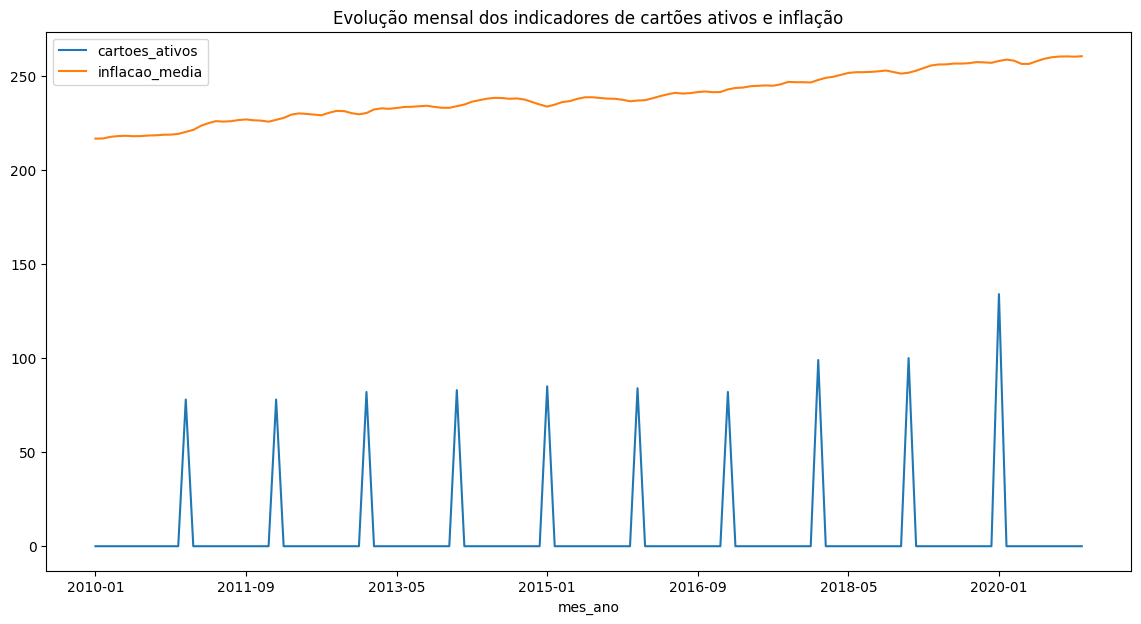

In [0]:
# 6. Visualizar a evolução dos indicadores ao longo do tempo para análise exploratória de cartõe ativos x inflação
# Filtrar para mostrar apenas dados entre 01/2010 e 12/2020
df_final_filtrado = df_final.filter((F.col("mes_ano") >= "2010-01") & (F.col("mes_ano") <= "2020-12"))
df_final_pd = df_final_filtrado.toPandas()
df_final_pd.plot(
    x="mes_ano",
    y=[
        "cartoes_ativos",
        "inflacao_media"
    ],
    figsize=(14, 7),
    title="Evolução mensal dos indicadores de cartões ativos e inflação"
)

<Axes: title={'center': 'Evolução mensal dos indicadores de cartões emitidos e inflação'}, xlabel='mes_ano'>

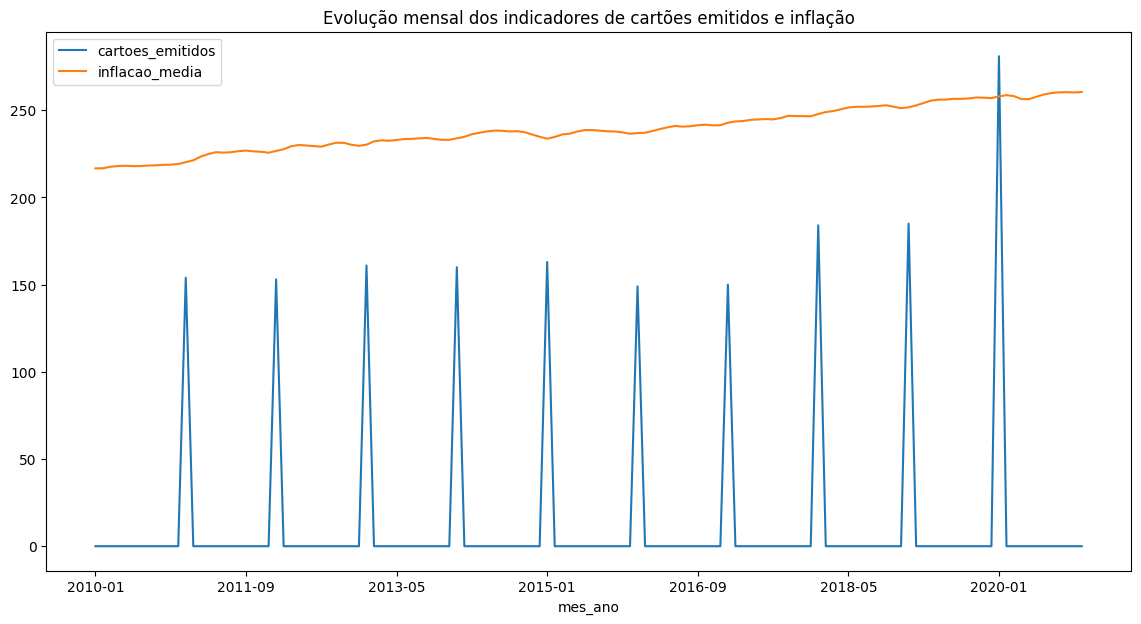

In [0]:
# 7. Visualizar a evolução dos indicadores ao longo do tempo para análise exploratória de cartões emitidos x inflação EUA
# Filtrar para mostrar apenas dados entre 01/2010 e 12/2020
df_final_filtrado = df_final.filter((F.col("mes_ano") >= "2010-01") & (F.col("mes_ano") <= "2020-12"))
df_final_pd = df_final_filtrado.toPandas()
df_final_pd.plot(
    x="mes_ano",
    y=[
        "cartoes_emitidos",
        "inflacao_media"
    ],
    figsize=(14, 7),
    title="Evolução mensal dos indicadores de cartões emitidos e inflação"
)

<Axes: title={'center': 'Evolução mensal dos indicadores de quantidade de transações em cartões e inflação'}, xlabel='mes_ano'>

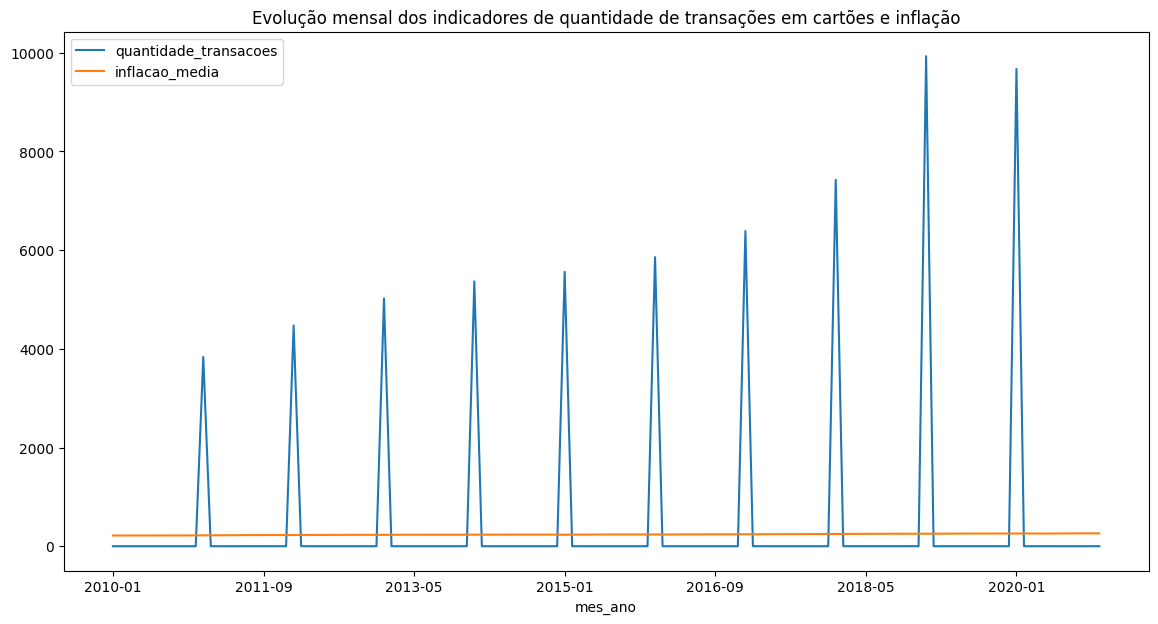

In [0]:
# 8. Visualizar a evolução dos indicadores ao longo do tempo para análise exploratória de quantidade transações x inflação
# Filtrar para mostrar apenas dados entre 01/2010 e 12/2020
df_final_filtrado = df_final.filter((F.col("mes_ano") >= "2010-01") & (F.col("mes_ano") <= "2020-12"))
df_final_pd = df_final_filtrado.toPandas()
df_final_pd.plot(
    x="mes_ano",
    y=[
        "quantidade_transacoes", 
        "inflacao_media"
    ],
    figsize=(14, 7),
    title="Evolução mensal dos indicadores de quantidade de transações em cartões e inflação"
)

<Axes: title={'center': 'Evolução mensal dos indicadores de valor transações cartão de crédito e inflação'}, xlabel='mes_ano'>

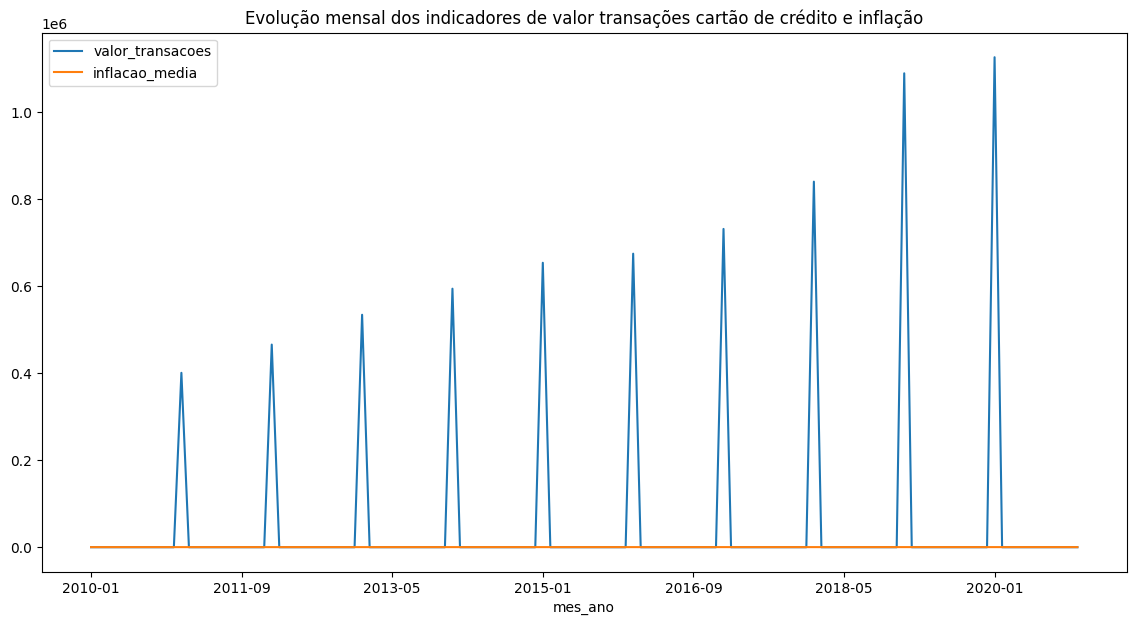

In [0]:
# 9. Visualizar a evolução dos indicadores ao longo do tempo para análise exploratória de valor transações x inflação
# Filtrar para mostrar apenas dados entre 01/2010 e 12/2020
df_final_filtrado = df_final.filter((F.col("mes_ano") >= "2010-01") & (F.col("mes_ano") <= "2020-12"))
df_final_pd = df_final_filtrado.toPandas()
df_final_pd.plot(
    x="mes_ano",
    y=[
        "valor_transacoes",
        "inflacao_media"
    ],
    figsize=(14, 7),
    title="Evolução mensal dos indicadores de valor transações cartão de crédito e inflação"
)